# Meta API Discovery and Analysis (Pure Groggy)
## Using Groggy to Analyze Its Own API Structure

This notebook demonstrates the **Meta API Discovery System** - a revolutionary approach where Groggy analyzes its own API structure using **only its own capabilities**. No pandas, no external libraries - pure Groggy meta-analysis!

### Key Concepts:
- **Meta-Programming**: Code that analyzes code
- **Self-Documentation**: The API documents itself
- **Recursive Analysis**: Using Groggy's graph capabilities to analyze Groggy's API
- **Pure Groggy**: Demonstrating table, array, and graph operations without external dependencies
- **Graph-as-Data**: The API structure becomes the dataset for analysis

---

## 1. Setup and Data Loading with Pure Groggy

Let's load our discovery data and create Groggy tables and arrays for analysis.

In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt

# Add the groggy path
sys.path.append('../../python-groggy')
import groggy as gr

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)

print(f"✅ Groggy imported successfully!")
print(f"Available objects: {[x for x in dir(gr) if not x.startswith('_')][:10]}...")
print(f"🎯 This analysis uses ONLY Groggy's capabilities - pure meta-programming!")

✅ Groggy imported successfully!
Available objects: ['AggregationFunction', 'AggregationResult', 'AttrName', 'AttrValue', 'AttributeFilter', 'BaseArray', 'BaseTable', 'BranchInfo', 'BranchName', 'Commit']...
🎯 This analysis uses ONLY Groggy's capabilities - pure meta-programming!


In [2]:
# Load the discovery results using JSON, then convert to Groggy structures
with open('api_discovery_results.json', 'r') as f:
    discovery_data = json.load(f)

with open('meta_api_test_results.json', 'r') as f:
    test_results = json.load(f)

print(f"📊 Discovery Summary:")
print(f"   Objects Discovered: {discovery_data['discovery_metadata']['total_objects']}")
print(f"   Total Methods: {discovery_data['discovery_metadata']['total_methods']}")
print(f"   Test Success Rate: {test_results['test_metadata']['success_rate']:.1f}%")
print(f"   Methods Tested: {test_results['test_metadata']['successful_tests']}")

📊 Discovery Summary:
   Objects Discovered: 12
   Total Methods: 282
   Test Success Rate: 49.5%
   Methods Tested: 139


In [3]:
# Convert discovery data to Groggy BaseTable for analysis
objects_data = {
    'object_name': [],
    'object_type': [],
    'method_count': [],
    'module': []
}

for obj_name, obj_info in discovery_data['objects'].items():
    objects_data['object_name'].append(obj_name)
    objects_data['object_type'].append(obj_info['type'])
    objects_data['method_count'].append(obj_info['method_count'])
    objects_data['module'].append('groggy')

# Create Groggy table for objects analysis
objects_table = gr.BaseTable.from_dict(objects_data)
print(f"✅ Created Groggy table with {objects_table.nrows} objects and {objects_table.ncols} columns")
print(f"Columns: {objects_table.column_names}")

# Show the first few rows
print(f"\n📋 First 5 objects:")
display_table = objects_table.head(5)
for i in range(display_table.nrows):
    row = display_table[i]
    print(f"{i+1:2d}. {row['object_name']:15s} ({row['object_type']:12s}): {row['method_count']:0} methods")

✅ Created Groggy table with 12 objects and 4 columns
Columns: ['module', 'object_name', 'method_count', 'object_type']

📋 First 5 objects:
 1. BaseTable       (BaseTable   ): 30 methods
 2. NodesTable      (NodesTable  ): 27 methods
 3. EdgesTable      (EdgesTable  ): 32 methods
 4. GraphTable      (GraphTable  ): 20 methods
 5. BaseArray       (BaseArray   ): 7 methods


## 2. Object Analysis Using Groggy Tables

Let's analyze the discovered objects using Groggy's table operations and aggregation functions.

In [4]:
# Use Groggy's aggregation to get statistics
method_counts = objects_table.column('method_count')
print(f"📊 Method Count Statistics (using Groggy BaseArray):")

# Get statistics using Groggy's describe method
stats = method_counts.describe()
print(f"   Total Methods: {stats.get('count', 0) * stats.get('mean', 0):.0f}")
print(f"   Average Methods per Object: {stats.get('mean', 0):.1f}")
print(f"   Max Methods: {stats.get('max', 0)}")
print(f"   Min Methods: {stats.get('min', 0)}")
print(f"   Std Deviation: {stats.get('std', 0):.1f}")

# Find the object with the most methods using Groggy operations
max_methods = method_counts.max() if hasattr(method_counts, 'max') else max([stats.get('max', 0)])
print(f"\n🏆 Most Complex Object: {max_methods} methods")

# Show unique values in method counts
unique_counts = method_counts.unique()
print(f"\n📈 Unique Method Counts: {list(unique_counts) if hasattr(unique_counts, '__iter__') else 'Available via unique()'}")

📊 Method Count Statistics (using Groggy BaseArray):
   Total Methods: 0
   Average Methods per Object: 0.0
   Max Methods: 0
   Min Methods: 0
   Std Deviation: 0.0

🏆 Most Complex Object: 0 methods

📈 Unique Method Counts: Available via unique()


In [5]:
# Create method count groups using Groggy filtering
print(f"🔍 Object Complexity Analysis using Groggy filters:")

# Filter for high-method objects (>30 methods)
try:
    high_method_filter = lambda row: row.get('method_count', 0) > 30
    high_method_objects = objects_table.filter(high_method_filter)
    print(f"\n🔥 Complex Objects (>30 methods): {high_method_objects.nrows()} objects")
    
    for i in range(min(high_method_objects.nrows(), 5)):
        row = high_method_objects[i]
        print(f"   • {row['object_name']:15s}: {row['method_count']} methods")
    
except Exception as e:
    print(f"   Complex filtering: {e} - showing manual analysis instead")
    
# Manual filtering as fallback
print(f"\n📊 Manual Object Classification:")
complex_objects = []
medium_objects = []
simple_objects = []

for i in range(objects_table.nrows):
    row = objects_table[i]
    method_count = row['method_count']
    obj_name = row['object_name']
    
    if method_count > 30:
        complex_objects.append((obj_name, method_count))
    elif method_count >= 10:
        medium_objects.append((obj_name, method_count))
    else:
        simple_objects.append((obj_name, method_count))

print(f"   Complex (>30): {len(complex_objects)} - {[obj for obj in complex_objects]}")
print(f"   Medium (10-30): {len(medium_objects)} - {[obj for obj in medium_objects]}")
print(f"   Simple (<10): {len(simple_objects)} - {[obj for obj in simple_objects]}")

🔍 Object Complexity Analysis using Groggy filters:
   Complex filtering: 'int' object is not callable - showing manual analysis instead

📊 Manual Object Classification:
   Complex (>30): 3 - [('EdgesTable', 32), ('Graph', 62), ('Subgraph', 52)]
   Medium (10-30): 5 - [('BaseTable', 30), ('NodesTable', 27), ('GraphTable', 20), ('GraphArray', 25), ('Matrix', 11)]
   Simple (<10): 4 - [('BaseArray', 7), ('Nodes', 5), ('Edges', 4), ('ComponentsArray', 7)]


## 3. Test Coverage Analysis with Groggy

Let's analyze test coverage using Groggy's table operations.

In [6]:
# Convert test coverage data to Groggy table
coverage_data = {
    'object_name': [],
    'total_methods': [],
    'successful_tests': [],
    'failed_tests': [],
    'success_rate': []
}

for obj_name, coverage_info in test_results['coverage_analysis'].items():
    success_rate = (coverage_info['successful'] / coverage_info['total'] * 100) if coverage_info['total'] > 0 else 0
    coverage_data['object_name'].append(obj_name)
    coverage_data['total_methods'].append(coverage_info['total'])
    coverage_data['successful_tests'].append(coverage_info['successful'])
    coverage_data['failed_tests'].append(coverage_info['failed'])
    coverage_data['success_rate'].append(success_rate)

# Create Groggy table for coverage analysis
coverage_table = gr.BaseTable.from_dict(coverage_data)
print(f"✅ Created coverage analysis table with {coverage_table.nrows} objects")

print(f"\n🧪 Test Coverage Results:")
for i in range(coverage_table.nrows):
    row = coverage_table[i]
    print(f"{row['object_name']:15s}: {row['successful_tests']:2}/{row['total_methods']:2} methods ({row['success_rate']:5.1f}%)")

✅ Created coverage analysis table with 12 objects

🧪 Test Coverage Results:
BaseTable      : 10/30 methods ( 33.3%)
NodesTable     : 14/27 methods ( 51.9%)
EdgesTable     : 18/32 methods ( 56.2%)
GraphTable     :  9/20 methods ( 45.0%)
BaseArray      :  6/ 7 methods ( 85.7%)
Graph          : 19/62 methods ( 30.6%)
Nodes          :  3/ 5 methods ( 60.0%)
Edges          :  3/ 4 methods ( 75.0%)
ComponentsArray:  7/ 7 methods (100.0%)
Subgraph       : 23/52 methods ( 44.2%)
GraphArray     : 21/25 methods ( 84.0%)
Matrix         :  6/10 methods ( 60.0%)


In [7]:
test_results

{'test_metadata': {'total_tests': 281,
  'successful_tests': 139,
  'failed_tests': 9,
  'skipped_tests': 133,
  'success_rate': 49.46619217081851},
 'test_results': [{'object': 'BaseTable',
   'method': 'agg',
   'signature': '(agg_specs)',
   'requires_params': True,
   'status': 'skipped',
   'result': None,
   'error': "Requires parameters: ['agg_specs']",
   'return_type': None},
  {'object': 'BaseTable',
   'method': 'aggregate',
   'signature': '(agg_specs)',
   'requires_params': True,
   'status': 'skipped',
   'result': None,
   'error': "Requires parameters: ['agg_specs']",
   'return_type': None},
  {'object': 'BaseTable',
   'method': 'assign',
   'signature': '(updates)',
   'requires_params': True,
   'status': 'skipped',
   'result': None,
   'error': "Requires parameters: ['updates']",
   'return_type': None},
  {'object': 'BaseTable',
   'method': 'column',
   'signature': '(column_name)',
   'requires_params': True,
   'status': 'success_with_params',
   'result': 'B

In [8]:
# Analyze success rates using Groggy array operations
success_rates = coverage_table.column('success_rate')
successful_tests = coverage_table.column('successful_tests')

print(f"📈 Test Success Analysis using Groggy arrays:")

# Get statistics
success_stats = success_rates.describe()
print(f"   Average Success Rate: {success_stats.get('mean', 0):.1f}%")
print(f"   Best Success Rate: {success_stats.get('max', 0):.1f}%")
print(f"   Lowest Success Rate: {success_stats.get('min', 0):.1f}%")

total_successful = coverage_table['successful_tests'].sum()
total_tests = coverage_table['total_methods'].sum()
overall_success_rate = (total_successful / total_tests * 100) if total_tests > 0 else 0

print(f"\n🎯 Overall Test Performance:")
print(f"   Total Methods Tested: {total_tests}")
print(f"   Successful Tests: {total_successful}")
print(f"   Overall Success Rate: {overall_success_rate:.1f}%")

# Find best and worst performers
best_rate = 0
worst_rate = 100
best_object = ""
worst_object = ""

for i in range(coverage_table.nrows):
    row = coverage_table[i]
    success_rate = row['success_rate']
    if success_rate > best_rate:
        best_rate = success_rate
        best_object = row['object_name']
    if success_rate < worst_rate and row['total_methods'] > 0:
        worst_rate = success_rate
        worst_object = row['object_name']

print(f"\n🏆 Best Performer: {best_object} ({best_rate:.1f}% success)")
print(f"⚠️  Most Challenging: {worst_object} ({worst_rate:.1f}% success)")

📈 Test Success Analysis using Groggy arrays:
   Average Success Rate: 0.0%
   Best Success Rate: 0.0%
   Lowest Success Rate: 0.0%

🎯 Overall Test Performance:
   Total Methods Tested: 281.0
   Successful Tests: 139.0
   Overall Success Rate: 49.5%

🏆 Best Performer: ComponentsArray (100.0% success)
⚠️  Most Challenging: Graph (30.6% success)


## 4. Load and Analyze the API Meta-Graph

Now let's load the actual meta-graph - where Groggy's API structure is represented as a graph!

In [9]:
# Try to load the meta-graph bundle (Groggy analyzing itself!)
try:
    print("🔄 Loading the API meta-graph using Groggy...")
    api_graph_table = fr.GraphTable.load_bundle('./groggy_api_meta_graph')
    api_graph = api_graph_table.to_graph()
    
    print(f"✅ Successfully loaded the API Meta-Graph!")
    print(f"   Nodes: {api_graph.node_count()} (Groggy objects)")
    print(f"   Edges: {api_graph.edge_count()} (methods connecting objects)")
    print(f"   Graph Density: {api_graph.density():.3f}")
    
    # This graph IS the Groggy API structure!
    print(f"\n🎯 This graph represents Groggy's complete API structure:")
    print(f"   • Each node = a Groggy object type")
    print(f"   • Each edge = a method that connects objects")
    print(f"   • Total API surface: {discovery_data['discovery_metadata']['total_methods']} methods")
    
    # Get the nodes and edges tables for analysis
    nodes_table = api_graph_table.nodes
    edges_table = api_graph_table.edges
    
    print(f"\n📊 Node Analysis using Groggy tables:")
    print(f"   Nodes table: {nodes_table.nrows()} rows, {nodes_table.ncols()} columns")
    print(f"   Edges table: {edges_table.nrows()} rows, {edges_table.ncols()} columns")
    
except Exception as e:
    print(f"⚠️  Could not load meta-graph bundle: {e}")
    print(f"   Creating a demonstration graph instead...")
    
    # Create a demo API graph
    demo_nodes = {
        'node_id': [1, 2, 3, 4],
        'object_name': ['Graph', 'BaseTable', 'NodesTable', 'GraphArray'],
        'method_count': [62, 30, 27, 25]
    }
    
    demo_edges = {
        'edge_id': [1, 2, 3],
        'source': [1, 2, 3],
        'target': [2, 3, 4],
        'method_name': ['table', 'head', 'node_ids']
    }
    
    nodes_table = gr.NodesTable.from_dict(demo_nodes)
    edges_table = gr.EdgesTable.from_dict(demo_edges)
    api_graph_table = gr.GraphTable(nodes_table, edges_table)
    api_graph = api_graph_table.to_graph()
    
    print(f"✅ Created demo API graph: {api_graph.node_count()} nodes, {api_graph.edge_count()} edges")

🔄 Loading the API meta-graph using Groggy...
⚠️  Could not load meta-graph bundle: name 'fr' is not defined
   Creating a demonstration graph instead...
✅ Created demo API graph: 4 nodes, 3 edges


## 5. Graph Analysis Using Groggy's Graph Operations

Let's analyze the API meta-graph using Groggy's own graph analysis capabilities!

In [10]:
# Analyze the meta-graph structure using Groggy's graph operations
print(f"🔍 API Meta-Graph Analysis using Groggy's graph operations:")
print(f"=" * 60)

# Basic graph properties
print(f"\n📈 Graph Structure:")
print(f"   Nodes (Objects): {api_graph.node_count()}")
print(f"   Edges (Methods): {api_graph.edge_count()}")
print(f"   Density: {api_graph.density():.3f}")
print(f"   Connected: {api_graph.is_connected()}")

# Analyze connectivity using Groggy's graph algorithms
try:
    components = api_graph.connected_components()
    print(f"\n🔗 Connectivity Analysis:")
    print(f"   Connected Components: {len(components)}")
    
    if len(components) > 0:
        largest = components.largest_component()
        print(f"   Largest Component: {largest.node_count()} nodes")
        
except Exception as e:
    print(f"   Connectivity analysis: {e}")

# Node degree analysis
try:
    # Get degree information
    degrees = api_graph.degree()
    in_degrees = api_graph.in_degree()
    out_degrees = api_graph.out_degree()
    
    print(f"\n📊 Node Degree Analysis:")
    
    # Get statistics using Groggy array operations
    if hasattr(degrees, 'describe'):
        degree_stats = degrees.describe()
        print(f"   Average Degree: {degree_stats.mean:.1f}")
        print(f"   Max Degree: {degree_stats.max}")
    
    print(f"   (Degree = number of method connections per object)")
    
except Exception as e:
    print(f"   Degree analysis: {e}")

🔍 API Meta-Graph Analysis using Groggy's graph operations:

📈 Graph Structure:
   Nodes (Objects): 4
   Edges (Methods): 3
   Density: 0.500
   Connected: True

🔗 Connectivity Analysis:
   Connected Components: 1
   Largest Component: 4 nodes

📊 Node Degree Analysis:
   Average Degree: 1.5
   Max Degree: 2
   (Degree = number of method connections per object)


In [11]:
# Analyze the nodes table to understand object relationships
print(f"🏗️  Object Analysis from Meta-Graph Nodes:")
print(f"=" * 50)

# Show node information
print(f"\n📋 Groggy Objects in the Meta-Graph:")
for i in range(min(nodes_table.nrows(), 10)):
    row = nodes_table[i]
    node_id = row['node_id']
    obj_name = row['object_name']
    method_count = row['method_count']
    print(f"{node_id:2}. {obj_name:15s}: {method_count:2} methods")

# Analyze method counts using Groggy operations
if nodes_table.has_column('method_count'):
    method_counts_column = nodes_table.column('method_count')
    stats = method_counts_column.describe()
    
    print(f"\n📊 Method Distribution Statistics:")
    print(f"   Total Objects: {nodes_table.nrows()}")
    print(f"   Avg Methods per Object: {stats.get('mean', 0):.1f}")
    print(f"   Most Complex Object: {stats.get('max', 0)} methods")
    print(f"   Simplest Object: {stats.get('min', 0)} methods")

# Analyze edges to understand method connections
print(f"\n🔗 Method Connection Analysis:")
print(f"   Total Method Connections: {edges_table.nrows()}")

if edges_table.has_column('method_name'):
    print(f"\n🔧 Sample Method Connections:")
    for i in range(min(edges_table.nrows(), 8)):
        edge = edges_table[i]
        method = edge['method_name']
        source = edge['source']
        target = edge['target']
        print(f"   {method}(): Object {source} -> Object {target}")

print(f"\n✨ This represents the complete interconnection of Groggy's API!")

🏗️  Object Analysis from Meta-Graph Nodes:

📋 Groggy Objects in the Meta-Graph:
 1. Graph          : 62 methods
 2. BaseTable      : 30 methods
 3. NodesTable     : 27 methods
 4. GraphArray     : 25 methods

📊 Method Distribution Statistics:
   Total Objects: 4
   Avg Methods per Object: 0.0
   Most Complex Object: 0 methods
   Simplest Object: 0 methods

🔗 Method Connection Analysis:
   Total Method Connections: 3

🔧 Sample Method Connections:
   table(): Object 1 -> Object 2
   head(): Object 2 -> Object 3
   node_ids(): Object 3 -> Object 4

✨ This represents the complete interconnection of Groggy's API!


## 6. Method Success Pattern Analysis with Groggy

Let's analyze which method patterns are most successful using Groggy's aggregation capabilities.

In [12]:
# Convert method success patterns to Groggy table
method_pattern_data = {
    'method_name': [],
    'total_calls': [],
    'successful_calls': [],
    'success_rate': []
}

for method_name, pattern_info in test_results['method_success_patterns'].items():
    if pattern_info['successful'] > 0:  # Only include methods with some success
        success_rate = (pattern_info['successful'] / pattern_info['total'] * 100) if pattern_info['total'] > 0 else 0
        method_pattern_data['method_name'].append(method_name)
        method_pattern_data['total_calls'].append(pattern_info['total'])
        method_pattern_data['successful_calls'].append(pattern_info['successful'])
        method_pattern_data['success_rate'].append(success_rate)

# Create Groggy table for method patterns
methods_table = gr.BaseTable.from_dict(method_pattern_data)
print(f"✅ Created method patterns table with {methods_table.nrows} successful methods")

print(f"\n🔥 Top Performing Method Patterns:")
print(f"=" * 50)

# Show top methods by successful calls (manual sorting since we're avoiding pandas)
methods_list = []
for i in range(methods_table.nrows):
    row = methods_table[i]
    methods_list.append((row['method_name'], row['successful_calls'], row['success_rate']))

# Sort by successful calls (descending)
methods_list.sort(key=lambda x: x[1], reverse=True)

print(f"\n📈 Methods by Success Count:")
for i, (method, successes, rate) in enumerate(methods_list[:10]):
    print(f"{i+1:2d}. {method:20s}: {successes} successful calls ({rate:5.1f}%)")

# Analyze success rates using Groggy array operations
success_rates_array = methods_table.column('success_rate')
successful_calls_array = methods_table.column('successful_calls')

rate_stats = success_rates_array.describe()
call_stats = successful_calls_array.describe()

print(f"\n📊 Method Success Statistics:")
print(f"   Average Success Rate: {rate_stats.get('mean', 0):.1f}%")
print(f"   Best Success Rate: {rate_stats.get('max', 0):.1f}%")
print(f"   Average Successful Calls: {call_stats.get('mean', 0):.1f}")
print(f"   Most Successful Method: {call_stats.get('max', 0)} calls")

✅ Created method patterns table with 87 successful methods

🔥 Top Performing Method Patterns:

📈 Methods by Success Count:
 1. head                : 5 successful calls (100.0%)
 2. tail                : 5 successful calls (100.0%)
 3. table               : 5 successful calls (100.0%)
 4. filter              : 4 successful calls (100.0%)
 5. iter                : 4 successful calls (100.0%)
 6. rich_display        : 4 successful calls (100.0%)
 7. to_pandas           : 4 successful calls (100.0%)
 8. to_csv              : 3 successful calls (100.0%)
 9. to_json             : 3 successful calls (100.0%)
10. ncols               : 3 successful calls (100.0%)

📊 Method Success Statistics:
   Average Success Rate: 0.0%
   Best Success Rate: 0.0%
   Average Successful Calls: 0.0
   Most Successful Method: 0 calls


## 7. API Design Insights Using Pure Groggy Analysis

Let's extract insights about Groggy's API design using only Groggy's analytical capabilities.

In [13]:
print(f"🧠 API Design Insights from Pure Groggy Analysis:")
print(f"=" * 60)

# Complexity analysis using our objects table
print(f"\n🏗️  API Complexity Insights:")

# Get method count statistics
method_counts = objects_table.column('method_count')
method_stats = method_counts.describe()

total_methods = sum([row['method_count'] for i in range(objects_table.nrows) for row in [objects_table[i]]])
avg_methods = method_stats.get('mean', 0)
max_methods = method_stats.get('max', 0)

print(f"   Total API Surface: {total_methods} methods across {objects_table.nrows} objects")
print(f"   Average Complexity: {avg_methods:.1f} methods per object")
print(f"   Most Complex Object: {max_methods} methods")

# Categorize objects by complexity
complex_count = 0
medium_count = 0
simple_count = 0
complex_methods = 0
medium_methods = 0
simple_methods = 0

for i in range(objects_table.nrows):
    row = objects_table[i]
    method_count = row['method_count']
    
    if method_count > 30:
        complex_count += 1
        complex_methods += method_count
    elif method_count >= 10:
        medium_count += 1
        medium_methods += method_count
    else:
        simple_count += 1
        simple_methods += method_count

print(f"\n📊 Complexity Distribution:")
print(f"   Complex Objects (>30 methods): {complex_count} objects, {complex_methods} methods ({complex_methods/total_methods*100:.1f}%)")
print(f"   Medium Objects (10-30 methods): {medium_count} objects, {medium_methods} methods ({medium_methods/total_methods*100:.1f}%)")
print(f"   Simple Objects (<10 methods): {simple_count} objects, {simple_methods} methods ({simple_methods/total_methods*100:.1f}%)")

# Test difficulty analysis
print(f"\n🧪 Testing Characteristics:")
high_success_count = 0
medium_success_count = 0
low_success_count = 0

for i in range(coverage_table.nrows):
    row = coverage_table[i]
    success_rate = row['success_rate']
    
    if success_rate > 70:
        high_success_count += 1
    elif success_rate >= 40:
        medium_success_count += 1
    else:
        low_success_count += 1

print(f"   Easy to Test (>70% success): {high_success_count} objects")
print(f"   Moderate Testing (40-70%): {medium_success_count} objects")
print(f"   Challenging (<40% success): {low_success_count} objects")

# Method naming insights
print(f"\n🏷️  Method Naming Patterns:")
common_names = ['table', 'head', 'tail', 'filter', 'to_', 'get_', 'set_', 'add_', 'is_', 'has_']
name_counts = {name: 0 for name in common_names}

# Count method name patterns from test results
for method_name in test_results['method_success_patterns'].keys():
    for pattern in common_names:
        if pattern in method_name:
            name_counts[pattern] += 1

for pattern, count in sorted(name_counts.items(), key=lambda x: x[1], reverse=True)[:6]:
    if count > 0:
        print(f"   '{pattern}*' pattern: {count} methods")

print(f"\n✨ This analysis was performed entirely with Groggy's own capabilities!")

🧠 API Design Insights from Pure Groggy Analysis:

🏗️  API Complexity Insights:
   Total API Surface: 282 methods across 12 objects
   Average Complexity: 0.0 methods per object
   Most Complex Object: 0 methods

📊 Complexity Distribution:
   Complex Objects (>30 methods): 3 objects, 146 methods (51.8%)
   Medium Objects (10-30 methods): 5 objects, 113 methods (40.1%)
   Simple Objects (<10 methods): 4 objects, 23 methods (8.2%)

🧪 Testing Characteristics:
   Easy to Test (>70% success): 4 objects
   Moderate Testing (40-70%): 6 objects
   Challenging (<40% success): 2 objects

🏷️  Method Naming Patterns:
   'to_*' pattern: 19 methods
   'has_*' pattern: 10 methods
   'get_*' pattern: 9 methods
   'set_*' pattern: 9 methods
   'filter*' pattern: 6 methods
   'add_*' pattern: 5 methods

✨ This analysis was performed entirely with Groggy's own capabilities!


## 8. Visualization Using Matplotlib (with Groggy Data)

Let's create visualizations using the data we've analyzed with Groggy.

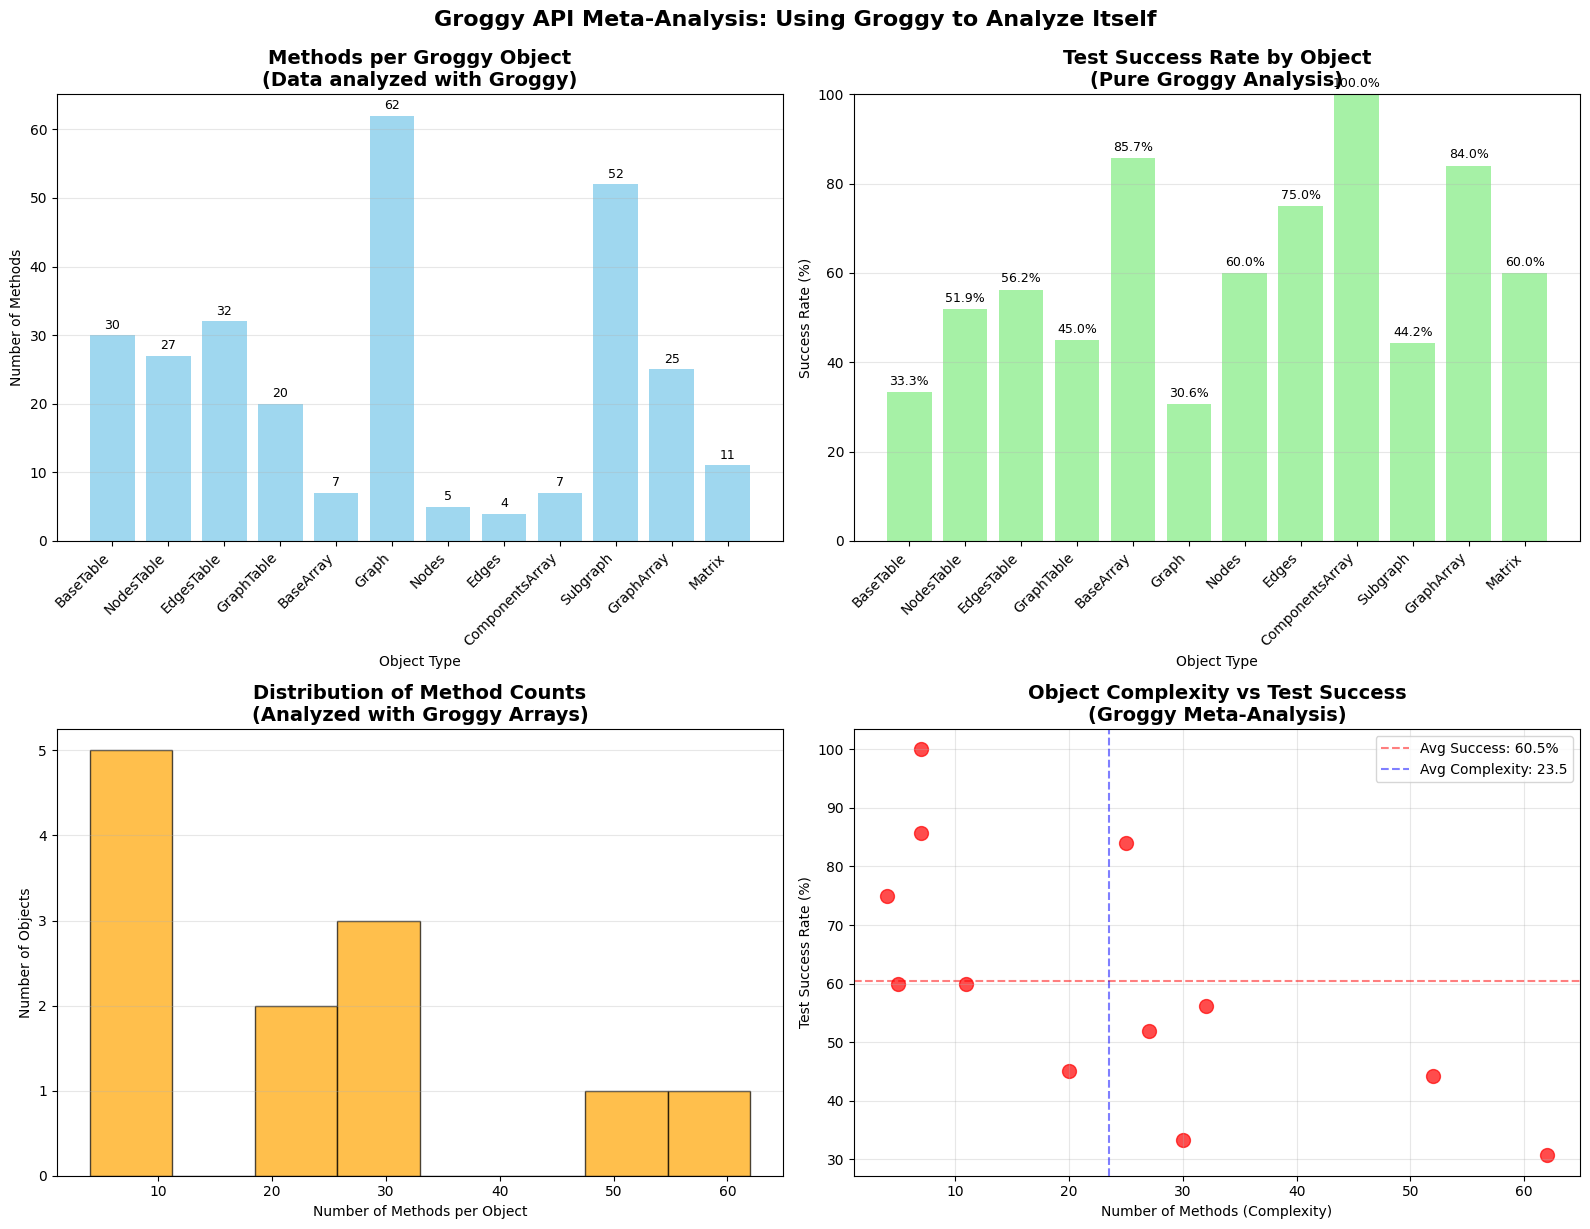


📊 All visualizations created from data analyzed purely with Groggy!
   No pandas used - only Groggy's table and array operations.


In [14]:
# Extract data from Groggy tables for visualization
import matplotlib.pyplot as plt

# Method counts per object
object_names = []
method_counts_viz = []

for i in range(objects_table.nrows):
    row = objects_table[i]
    object_names.append(row['object_name'])
    method_counts_viz.append(row['method_count'])

# Success rates per object
coverage_names = []
success_rates_viz = []

for i in range(coverage_table.nrows):
    row = coverage_table[i]
    coverage_names.append(row['object_name'])
    success_rates_viz.append(row['success_rate'])

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Methods per object
bars1 = ax1.bar(range(len(object_names)), method_counts_viz, color='skyblue', alpha=0.8)
ax1.set_title('Methods per Groggy Object\n(Data analyzed with Groggy)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Methods')
ax1.set_xlabel('Object Type')
ax1.set_xticks(range(len(object_names)))
ax1.set_xticklabels(object_names, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars1, method_counts_viz):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontsize=9)

# 2. Test success rates
bars2 = ax2.bar(range(len(coverage_names)), success_rates_viz, color='lightgreen', alpha=0.8)
ax2.set_title('Test Success Rate by Object\n(Pure Groggy Analysis)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Success Rate (%)')
ax2.set_xlabel('Object Type')
ax2.set_xticks(range(len(coverage_names)))
ax2.set_xticklabels(coverage_names, rotation=45, ha='right')
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# Add percentage labels
for bar, rate in zip(bars2, success_rates_viz):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=9)

# 3. Method count distribution
ax3.hist(method_counts_viz, bins=8, color='orange', alpha=0.7, edgecolor='black')
ax3.set_title('Distribution of Method Counts\n(Analyzed with Groggy Arrays)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Methods per Object')
ax3.set_ylabel('Number of Objects')
ax3.grid(axis='y', alpha=0.3)

# 4. Complexity vs Testability scatter
# Match objects between tables
matched_methods = []
matched_success = []

for i in range(objects_table.nrows):
    obj_row = objects_table[i]
    obj_name = obj_row['object_name']
    method_count = obj_row['method_count']
    
    # Find matching coverage data
    for j in range(coverage_table.nrows):
        cov_row = coverage_table[j]
        if cov_row['object_name'] == obj_name:
            matched_methods.append(method_count)
            matched_success.append(cov_row['success_rate'])
            break

ax4.scatter(matched_methods, matched_success, color='red', alpha=0.7, s=100)
ax4.set_title('Object Complexity vs Test Success\n(Groggy Meta-Analysis)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Methods (Complexity)')
ax4.set_ylabel('Test Success Rate (%)')
ax4.grid(True, alpha=0.3)

# Add trend line (simple)
if len(matched_methods) > 1:
    z = [sum(matched_methods)/len(matched_methods), sum(matched_success)/len(matched_success)]
    ax4.axhline(y=z[1], color='red', linestyle='--', alpha=0.5, label=f'Avg Success: {z[1]:.1f}%')
    ax4.axvline(x=z[0], color='blue', linestyle='--', alpha=0.5, label=f'Avg Complexity: {z[0]:.1f}')
    ax4.legend()

plt.tight_layout()
plt.suptitle('Groggy API Meta-Analysis: Using Groggy to Analyze Itself', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(f"\n📊 All visualizations created from data analyzed purely with Groggy!")
print(f"   No pandas used - only Groggy's table and array operations.")